### Gradient Descent VS Stochastic Gradient Descent  From Scratch For Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_regression
from datetime import datetime
np.random.seed(42)
random.seed(42)

In [2]:
def TrainTestSplit(data, target, test_size):
    
    n = len(data)
    k = int(test_size*n)
    idx = list(np.arange(n))
    test_idx = np.array(random.sample(idx, k))
    
    train = data[~data.index.isin(test_idx)]
    test = data[data.index.isin(test_idx)]
    
    X_train = train.drop(target, axis=1).to_numpy()
    X_test = test.drop(target, axis=1).to_numpy()
    
    y_train = train[target].to_numpy()
    y_train.shape = (y_train.shape[0],1)

    y_test = test[target].to_numpy()
    y_test.shape = (y_test.shape[0],1)
    
    return X_train, X_test, y_train, y_test

In [3]:
def add_ones(X):
    return np.concatenate((np.ones(shape=(X.shape[0],1)), X), axis=1)

In [4]:
def MSE(y, y_hat):
    d = y - y_hat
    return float((d.T @ d) / y.shape[0])

In [5]:
def gradient_descent(X, y, b_init, lr, epochs):
    
    b = b_init
    b_log, errors = [], []
    n = X.shape[0]
        
    for _ in range(epochs):

        y_hat = np.dot(X,b) 
        db = -2 * ( X.T @ (y - y_hat) )  / n 
        b = b - lr*db
        
        b_log.append(b)
        errors.append(MSE(y, y_hat))       
    
    return b_log, errors

In [6]:
def stochastic_gradient_descent(X, y, b_init, lr, epochs, batch_size):
    
    b = b_init
    b_log, errors = [], []
 
    for epoch in range(epochs):
        
        rand_idx = np.random.choice(X.shape[0], batch_size, replace=False)
        X_sampled = np.array([X[idx,:] for idx in rand_idx])
        y_sampled = np.array([y[idx] for idx in rand_idx])
        

        y_hat = np.dot(X_sampled,b) 
        db = -2 * ( X_sampled.T @ (y_sampled - y_hat) ) / batch_size 
        b = b - lr*db

        b_log.append(b)
        errors.append(MSE(y_sampled, y_hat))
        
    return b_log, errors

In [7]:
def predict(X_test, b_star):
    return X_test @ b_star

In [8]:
data = make_regression(n_samples=int(1e7), n_features=2, n_targets=1, random_state=42)
df = pd.DataFrame(data[0], columns=['x1','x2'])
df['y'] = data[1]
X_train, X_test, y_train, y_test = TrainTestSplit(df, target='y', test_size=.2)
X_train = add_ones(X_train)
X_test = add_ones(X_test)
b_init = np.random.randn(X_train.shape[1]).reshape(X_train.shape[1],1)

In [9]:
b_log, errors = gradient_descent(X_train, y_train, b_init, lr=0.05, epochs=100)

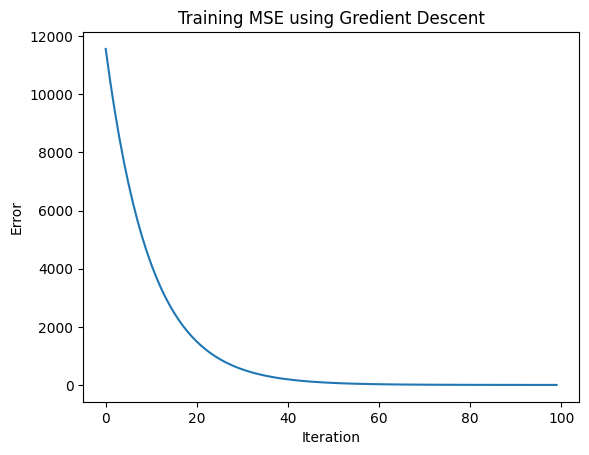

In [10]:
plt.plot(errors)
plt.title('Training MSE using Gredient Descent')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

In [11]:
y_hat = predict(X_test, b_star=b_log[-1])
mse = MSE(y_test, y_hat)
print ('Training Mean Squared Errorusing Gredient Descent:\t %.4f'%errors[-1])
print ('Test Mean Squared Errorusing Gredient Descent:\t\t %.4f'%mse)

Training Mean Squared Errorusing Gredient Descent:	 0.4557
Test Mean Squared Errorusing Gredient Descent:		 0.4114


In [12]:
b_log, errors = stochastic_gradient_descent(X_train, y_train, b_init, lr=0.05, epochs=100, batch_size=50)

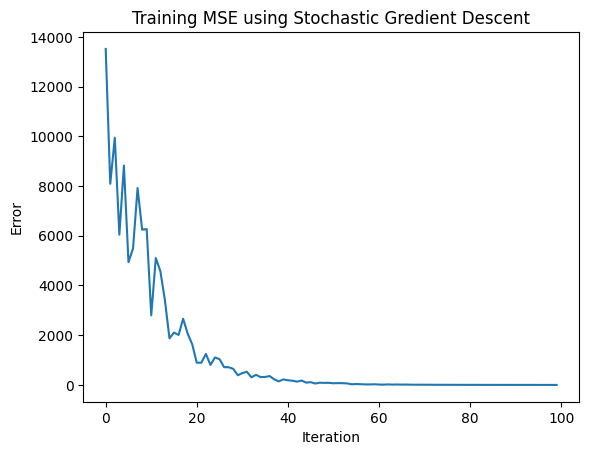

In [13]:
plt.plot(errors)
plt.title('Training MSE using Stochastic Gredient Descent')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

In [14]:
y_hat = predict(X_test, b_star=b_log[-1])
mse = MSE(y_test, y_hat)
print ('Training Mean Squared Errorusing Stochastic Gredient Descent:\t %.4f'%errors[-1])
print ('Test Mean Squared Errorusing Stochastic Gredient Descent:\t %.4f'%mse)

Training Mean Squared Errorusing Stochastic Gredient Descent:	 0.3330
Test Mean Squared Errorusing Stochastic Gredient Descent:	 0.3257
